# Unstuctured Data from CoinMarketCap


So to show a scarper for unstructured data, I searched for a static data site to be different from the next example(live data with Selenium). After some research, I decided to scrap the historical trading data from CoinMarketCap(https://coinmarketcap.com/) from the last month - of September.

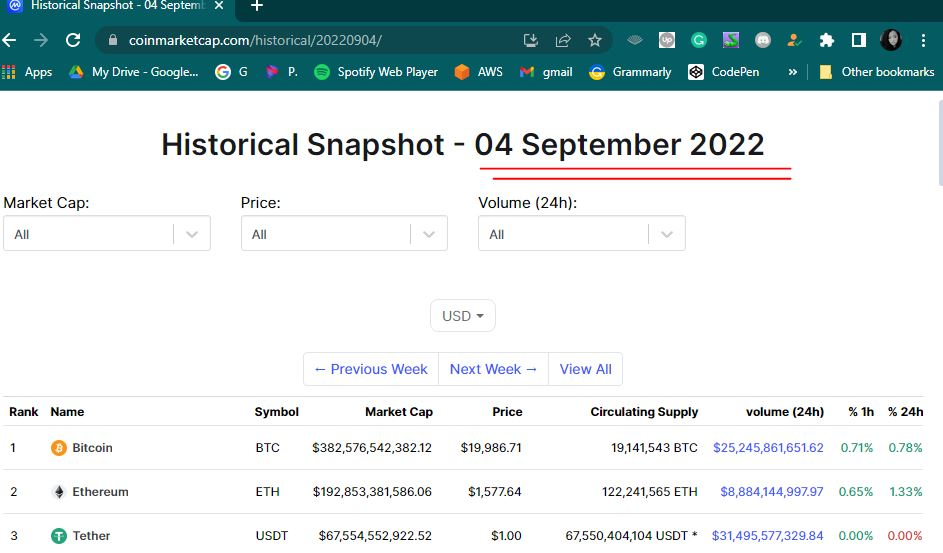


After studying the website slightly, I discover the data is organized onto multiple pages with different URLs based on the date(can be seen in pic above). With some experiments, I also discover the website does not load all the data until we scroll down to the bottom of the page. 

**Based on the above discoveries, my scraper will:**

1. go to each page within September(4 total), 
2. croll down to allow data to load, 
3. download the HTML, 
4. parse the data, 
5. and finally save them into CSV files named by the date. 


&emsp;
&emsp;

## Setting up my Script

I will start by importing some tools I will be using in this script. 


In [2]:
from bs4 import BeautifulSoup
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


Now I am going to create a list with the th4-weeks date in September.


In [3]:
setptember = ['20220904','20220911','20220918','20220925']


As well as the base URL string.


In [4]:
base = 'https://coinmarketcap.com/historical/'


csvRows will be a list to store my final results.


In [20]:
csvRows = []

&emsp;
&emsp;
&emsp;
&emsp;

## Get the Site to Load our Data

Now, everything is set up(including getting the chromedriver into the execution folder).

I create 2 functions that will allow me to open up a browser and scroll down to the bottom of the page. Once the data is loaded, the scroll(url) function shall then download the HTML file. 

In [6]:
def browser():
    global driver
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("window-size=1920,1080")
    driver = webdriver.Chrome(chrome_options=chrome_options)
    

def scroll(url):
    driver.get(url)
    time.sleep(1)
    for i in range(5):
        time.sleep(2)
        body =driver.find_element_by_xpath('//body')
        body.send_keys(Keys.PAGE_DOWN*2)
        time.sleep(3)
    content =driver.page_source
    return content

&emsp;

&emsp;
&emsp;
&emsp;
&emsp;

## Parsing the Data

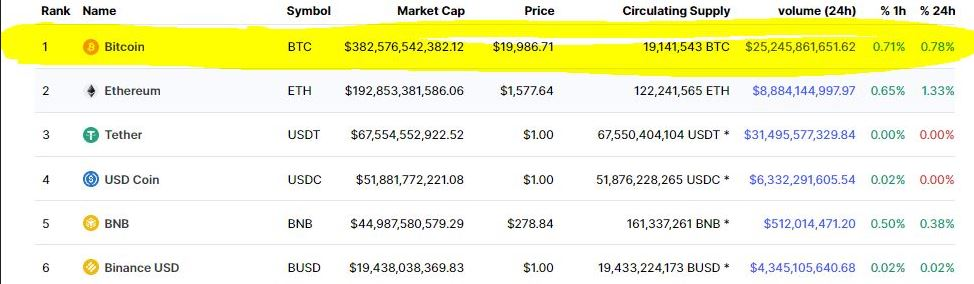

Looking at the website, my idea is to parse the row one by one(highlighted area will be considered a row in pic). This way, it will prevent the data from mixing between rows and minimize error and confusion. 
I will treat each row as a block. Here I created a parsing function to extract the target data from each block using text manipulation methods like .split.



**Clean(content) fuction here will loop though each row and take one input "content"(HTML file) using BeautifulSoup.**

In [10]:
def clean(content):
    BeautifulSoup(content, 'html')
    soup = BeautifulSoup(content, 'html')

    rows = soup.findAll('tr',attrs={'class':'cmc-table-row'})
    i=1
    for  r in rows:
       print(i)
       i+=1
       try:
           parse(r)
       except:
          print('non-targeted')


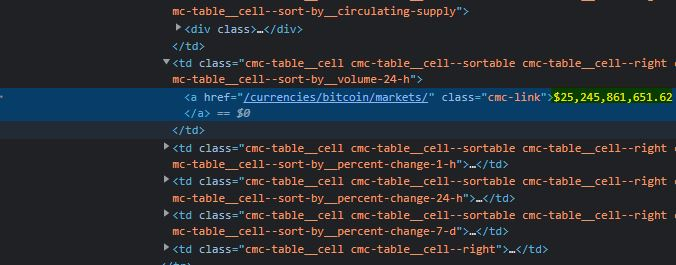

Then I inspected the element on the page to find unique HTML for the target data and do some detailing. 

In [9]:

def parse(block):
    b  = str(block)
    name= b.split('sort-by__symbol"><div class="">')[1].split('<')[0]
    cap = b.split('sort-by__market-cap"><div>')[1].split('<')[0]
    price = b.split('--sort-by__price"><div>')[1].split('<')[0]
    supply = b.split('circulating-supply"><div class="">')[1].split('<')[0]
    volume = b.split('><a class="cmc-link" href="/currencies/')[1].split('>')[1].split('<')[0]
    day = b.split('cmc--change-positive">')[1].split('<')[0]
    print('Name -'+str(name)+', cap -'+str(cap)+', price -'+str(price)+', sup -'+str(supply)+', vol -'+str(volume)+', 24h -'+str(day))
    csvRows.append([name,cap,price,supply,volume,day])


&emsp;
&emsp;
&emsp;
&emsp;

## Saving the Data


This function will save the data we get from each week of the month and save them based on the input “fileName” into a CSV file. 


In [12]:
def save(fileName):
    file_name = 'unStruData'+str(fileName)+".csv"

    with open(file_name, 'w', encoding='utf-8', newline='') as csvfile:
        writ=csv.writer(csvfile)
        title = ['Name', 'Market Cap', 'Price','Circulating Supply','Volume(24h)','%24h']
        writ.writerow(title)
        for item in csvRows:
            writ.writerow(item)
    print("csv file saved")   

&emsp;
&emsp;

&emsp;
&emsp;

## Running and Results

To Summarize, we will open a browser, loop for each week of the month and go to their specific URL, scroll down and download the HTML file, then we will clean up the data, finally save it as CSV. All of that is packed into the “main()” function below:

In [23]:
def main():
    browser()
    for date in setptember:
        url = base+date
        pageHtml = scroll(url)
        clean(pageHtml)
        save('coinmarket'+str(date))
    driver.quit()


&emsp;
&emsp;


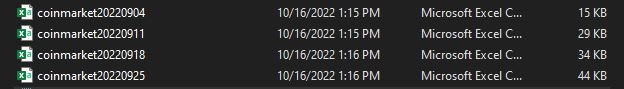

After running the script you get 4 CSV files in your folder for each week of the month of September. 
Here is a closer look of file:


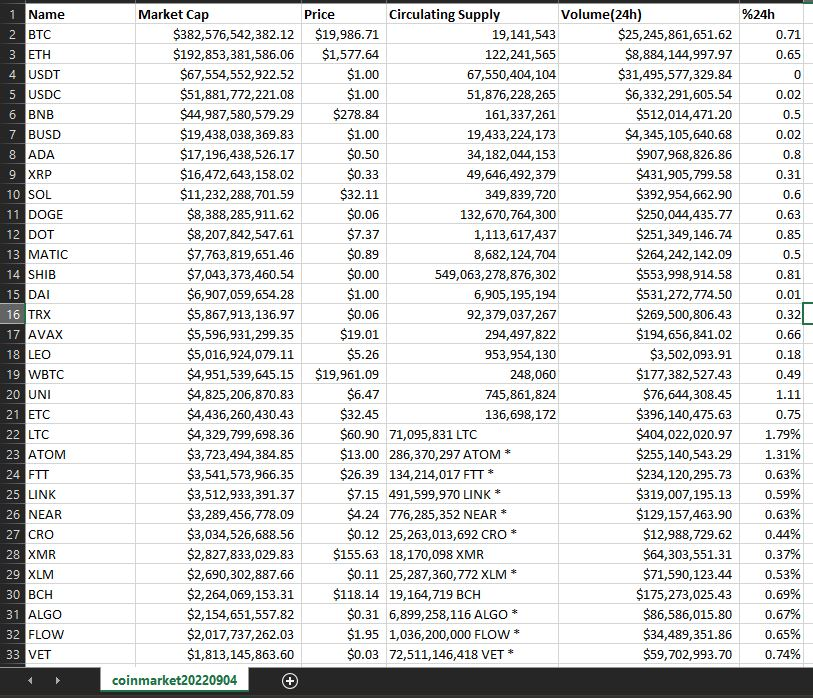

It is beautiful!
(I did ended up fixing up a couple of bugs to get the data to be 100% correct)